# XGBoost

## Setup

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, 
                            confusion_matrix, roc_auc_score,
                            RocCurveDisplay)

train_df = pd.read_csv("./datasets/train.csv")
val_df = pd.read_csv("./datasets/val.csv")
test_df = pd.read_csv("./datasets/test.csv")

# Define features and binary classification target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
train_df['target'] = (train_df['log_return'] > 0).astype(int)
val_df['target'] = (val_df['log_return'] > 0).astype(int)
test_df['target'] = (test_df['log_return'] > 0).astype(int)

# Extract features and target
X_train = train_df[features]
y_train = train_df['target']

X_val = val_df[features]
y_val = val_df['target']

X_test = test_df[features]
y_test = test_df['target']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Model Implementation

In [ ]:
# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dval = xgb.DMatrix(X_val_scaled, label=y_val)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# XGBoost parameters for binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.01,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 5,
    'alpha': 2,
    'gamma': 1,
    'min_child_weight': 5,
    'seed': 42 
}

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_boost_round=100000, evals=[(dtrain, 'train'), (dval, 'eval')], early_stopping_rounds=30, verbose_eval=False)

No Window
Accuracy: 0.6799
F1 Score: 0.7089
AUC-ROC Score: 0.7775

Confusion Matrix:
             Predicted Down  Predicted Up
Actual Down            4396          2935
Actual Up              1914          5905


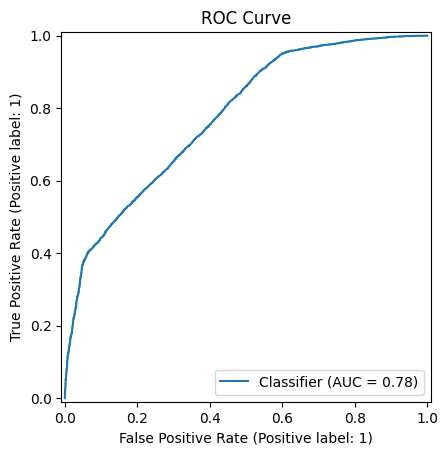

In [9]:
# Predictions
y_pred_prob = bst.predict(dtest)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc_roc = roc_auc_score(y_test, y_pred_prob)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display results
print("No Window")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix, 
                  index=['Actual Down', 'Actual Up'],
                  columns=['Predicted Down', 'Predicted Up']))

# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('ROC Curve')
plt.show()